In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x = np.array((-1.0, 0.3, 2.0)).reshape((1,3))
y = np.array((-0.1, 0.5, 0.5)).reshape((1,3))
biases = np.ones(x.size).reshape((1,3))
X = np.concatenate((biases, x), axis=0)
X_T = np.transpose(X)
w1 = np.array((-0.45, 0.2)).reshape(2,1)
H = np.matmul(X, X_T)
b = np.matmul(-X, y.T)
g = lambda w : np.matmul(H, w) + b 

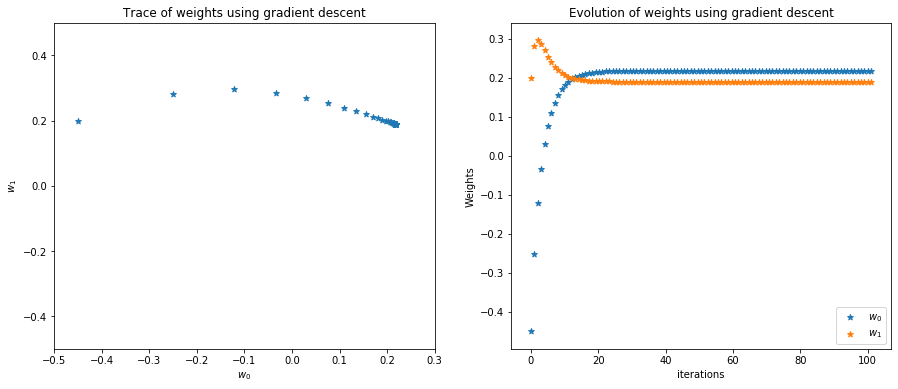

In [10]:
learing_rate = 10e-2
epoch = 100

weights = w1
w_t = w1
for i in range(epoch):
    w_t1 = w_t - learing_rate * g(w_t)
    weights = np.concatenate((weights, w_t1), axis=1)
    w_t = w_t1


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.scatter(weights[0,:], weights[1,:], marker="*")
ax1.set(xlabel='$w_0$', ylabel='$w_1$', xlim = [-0.5, 0.3], ylim = [-0.5, 0.5],
       title='Trace of weights using gradient descent')

ax2.scatter(np.linspace(0, epoch + 1, epoch + 1), weights[0,:], marker="*", label = '$w_0$')
ax2.scatter(np.linspace(0, epoch + 1, epoch + 1), weights[1,:], marker="*", label = '$w_1$')
ax2.set(xlabel='iterations', ylabel='Weights', 
        title='Evolution of weights using gradient descent')
ax2.legend(loc='lower right')
plt.show()

/home/david/VirtualEnvs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


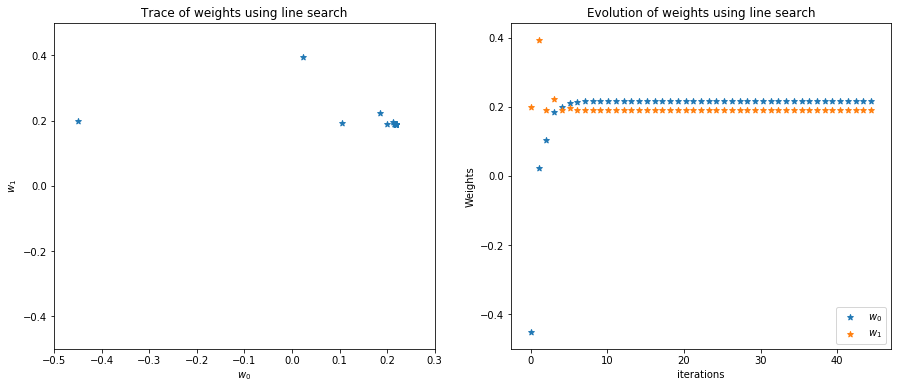

In [11]:
weights = w1
w_t = w1
for i in range(epoch):
    optim_step = np.matmul(g(w_t).T, g(w_t)) / np.matmul(np.matmul(g(w_t).T, H), g(w_t))
    w_t1 = w_t - optim_step * g(w_t)
    weights = np.concatenate((weights, w_t1), axis=1)
    w_t = w_t1


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.scatter(weights[0,:], weights[1,:], marker="*")
ax1.set(xlabel='$w_0$', ylabel='$w_1$', xlim = [-0.5, 0.3], ylim = [-0.5, 0.5],
       title='Trace of weights using line search')

ax2.scatter(np.linspace(0, epoch + 1, epoch + 1), weights[0,:], marker="*", label = '$w_0$')
ax2.scatter(np.linspace(0, epoch + 1, epoch + 1), weights[1,:], marker="*", label = '$w_1$')
ax2.set(xlabel='iterations', ylabel='Weights', 
        title='Evolution of weights using line search')
ax2.legend(loc='lower right')
plt.show()

/home/david/VirtualEnvs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/david/VirtualEnvs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


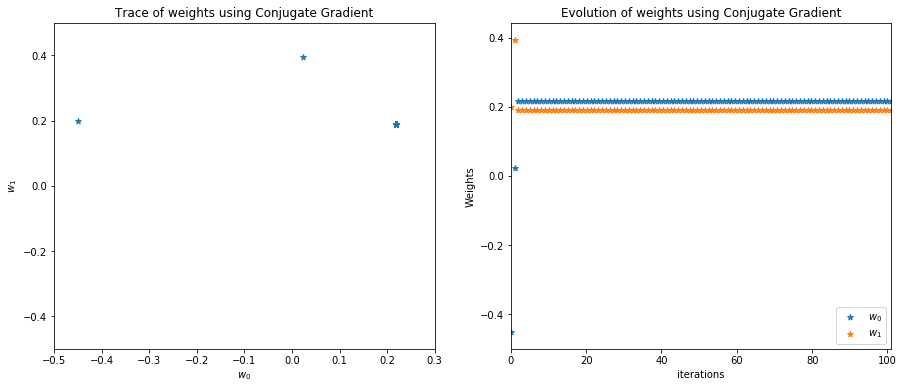

In [27]:
weights = w1
w_t = w1
d_1 = - g(w_t)

for i in range(epoch):
    optim_step = - np.matmul(d_1.T, g(w_t)) / np.matmul(np.matmul(d_1.T, H), d_1)
    if np.isnan(optim_step):
        optim_step = 0.
    w_t1 = w_t + optim_step * d_1
    momentum = - np.matmul(g(w_t1).T, g(w_t1))/np.matmul(g(w_t).T, g(w_t))
    if np.isnan(momentum):
        momentum = 0.
    d_t1 = g(w_t1) + momentum * d_1
    weights = np.concatenate((weights, w_t1), axis=1)
    w_t = w_t1
    d_1 = d_t1
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.scatter(weights[0,:], weights[1,:], marker="*")
ax1.set(xlabel='$w_0$', ylabel='$w_1$', xlim = [-0.5, 0.3], ylim = [-0.5, 0.5],
       title='Trace of weights using Conjugate Gradient')

ax2.scatter(np.linspace(0, epoch + 1, epoch + 1), weights[0,:], marker="*", label = '$w_0$')
ax2.scatter(np.linspace(0, epoch + 1, epoch + 1), weights[1,:], marker="*", label = '$w_1$')
ax2.set(xlabel='iterations', ylabel='Weights', xlim=[0,epoch+1],
        title='Evolution of weights using Conjugate Gradient')
ax2.legend(loc='lower right')
plt.show()